In [78]:
#import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import BatchNormalization


**Data Loading**

In [53]:
#load fashion mnist dataset from keras
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


In [54]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


**Data Visualization**
* The data includes pitures of shoes, tshirts, and some other fashion items (10 unique items).
* The data is perfectly balanced each class has 6,000 sample a total of 60,000 sample for the training set.
* Each sample is 28*28 pixel.

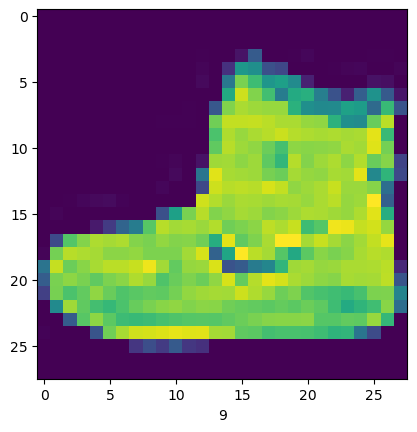

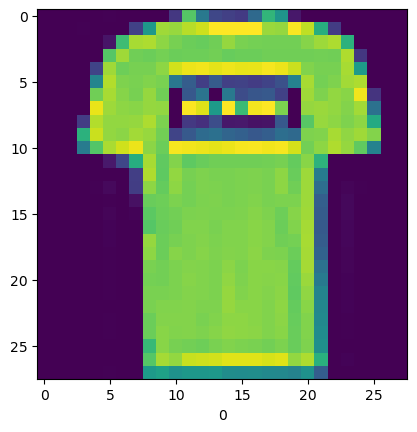

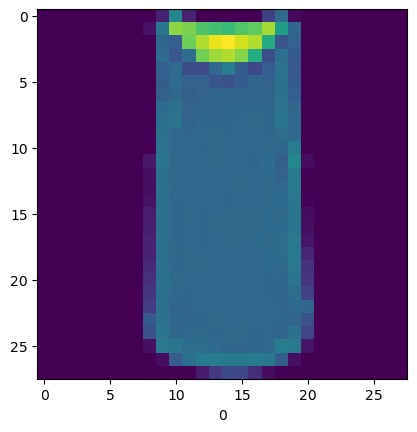

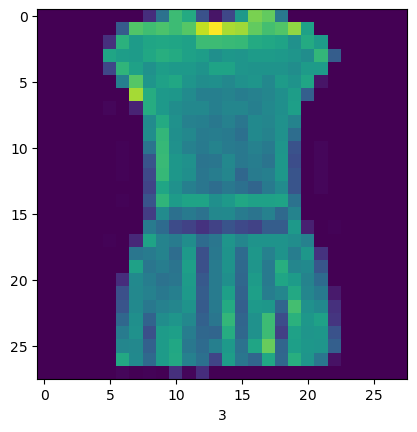

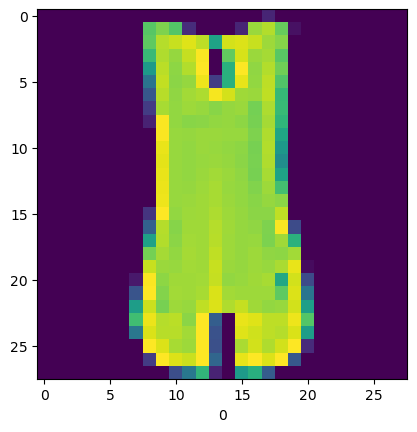

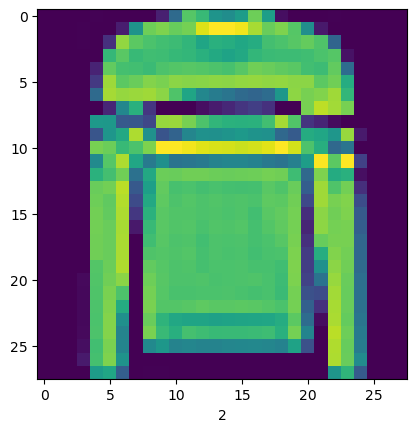

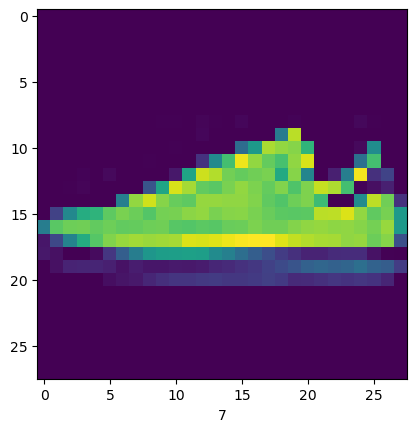

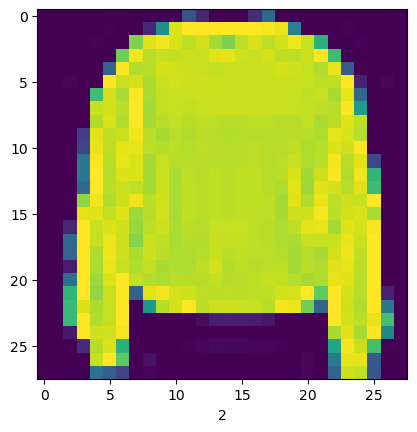

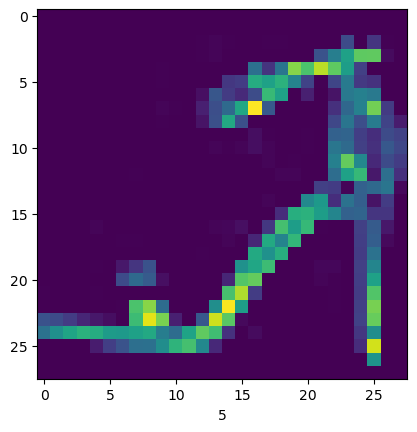

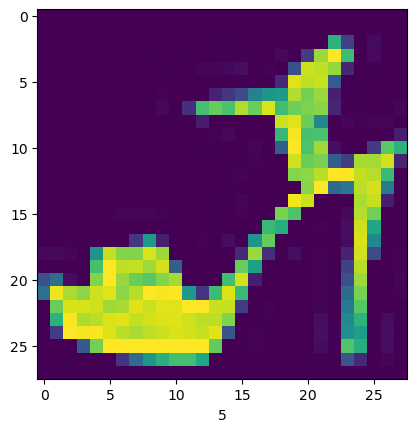

In [3]:
#show the first 10 images in the dataset with their labels
for i in range(10):
    plt.imshow(x_train[i])
    plt.xlabel(y_train[i])
    plt.show()


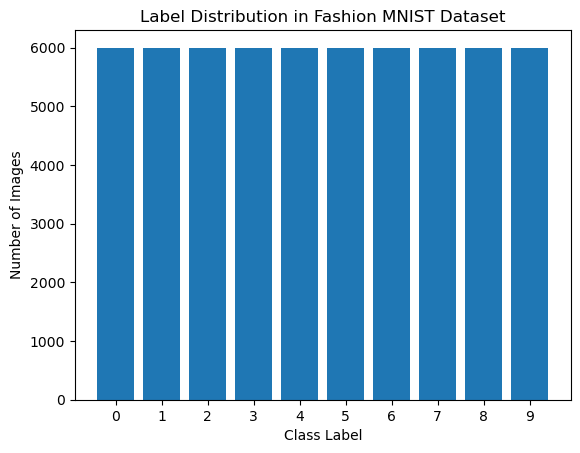

In [5]:
#see data count for each class
unique_labels, label_counts = np.unique(y_train, return_counts=True)

plt.bar(unique_labels, label_counts)
plt.xlabel('Class Label')
plt.ylabel('Number of Images')
plt.title('Label Distribution in Fashion MNIST Dataset')
plt.xticks(unique_labels)  # Set the x-tick labels to the class numbers
plt.show()

**Data pre-processing**

In [55]:
# split the test set into validation and test sets
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=42)
print(x_val.shape)

(5000, 28, 28)


In [56]:
#reshape the data to 1D
x_train = x_train.reshape(60000, 28*28)
x_val = x_val.reshape(5000, 28*28)
x_test = x_test.reshape(5000, 28*28)


In [57]:
#normalize the data
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

print(x_train.shape)
print(y_train[0])

(60000, 784)
9


**Model Creation**

In [216]:
#build the model
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))


/home/ann/miniconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Training and Validation**

In [217]:

#compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [218]:
#set early stopping
#early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
#learning rate scheduler
scheduler_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.35, patience=5)

#fit the model
history = model.fit(x=x_train, y=y_train, epochs=70, validation_data=(x_val, y_val), callbacks=[ scheduler_lr], batch_size=512)

Epoch 1/70
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.6524 - loss: 1.0997 - val_accuracy: 0.8028 - val_loss: 0.6281 - learning_rate: 0.0010
Epoch 2/70
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8433 - loss: 0.4609 - val_accuracy: 0.8444 - val_loss: 0.4439 - learning_rate: 0.0010
Epoch 3/70
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8557 - loss: 0.4079 - val_accuracy: 0.8546 - val_loss: 0.4082 - learning_rate: 0.0010
Epoch 4/70
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8660 - loss: 0.3830 - val_accuracy: 0.8528 - val_loss: 0.4157 - learning_rate: 0.0010
Epoch 5/70
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8716 - loss: 0.3584 - val_accuracy: 0.8478 - val_loss: 0.4474 - learning_rate: 0.0010
Epoch 6/70
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8758 - loss: 0.3468 - val_accuracy: 0.8596 - val_loss: 0.3941 - learning_rate: 0.0010
Epoch 7/70
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.8776 - loss: 0.

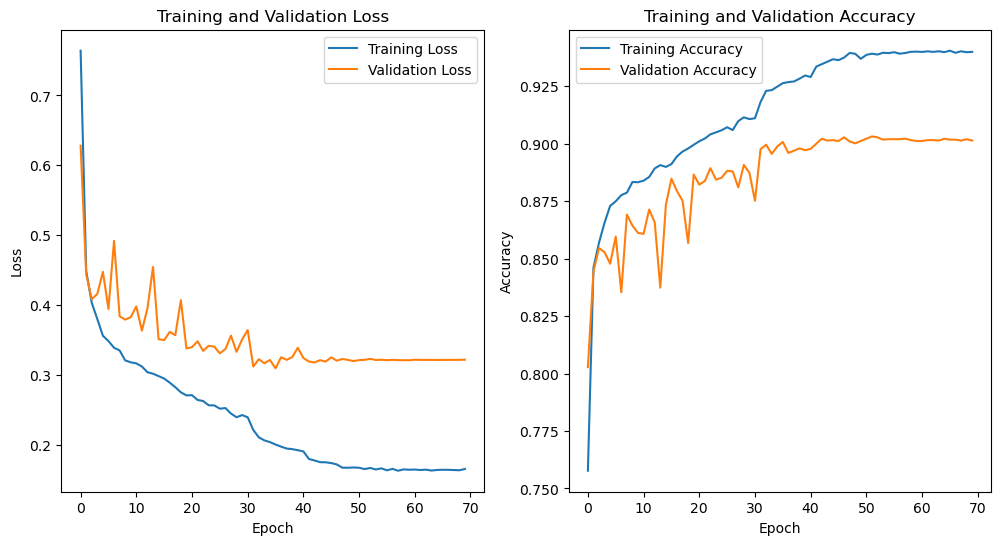

In [219]:
#Draw the loss and accuracy curves
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
training_accuracy = history.history.get('accuracy')  
validation_accuracy = history.history.get('val_accuracy') 

# Plot training & validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training & validation accuracy
plt.subplot(1, 2, 2)
plt.plot(training_accuracy, label='Training Accuracy')
plt.plot(validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

**Testing**

In [220]:
#test the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9007 - loss: 0.3016


**Model Evaluation**

In [221]:
#evaluate the model
predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis=1)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))


157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       487
           1       0.99      0.98      0.98       492
           2       0.81      0.84      0.82       514
           3       0.91      0.90      0.90       478
           4       0.82      0.83      0.83       506
           5       0.98      0.97      0.97       519
           6       0.76      0.69      0.72       496
           7       0.95      0.96      0.96       522
           8       0.99      0.98      0.98       490
           9       0.97      0.97      0.97       496

    accuracy                           0.90      5000
   macro avg       0.90      0.90      0.90      5000
weighted avg       0.90      0.90      0.90      5000

[[422   0   8  11   2   0  43   0   1   0]
 [  1 483   0   5   2   0   1   0   0   0]
 [  8   1 430   6  42   0  27   0   0   0]
 [ 14   4  10 430  13   0   5   0   2   0]
 [  0   0  44   8 422   0  3

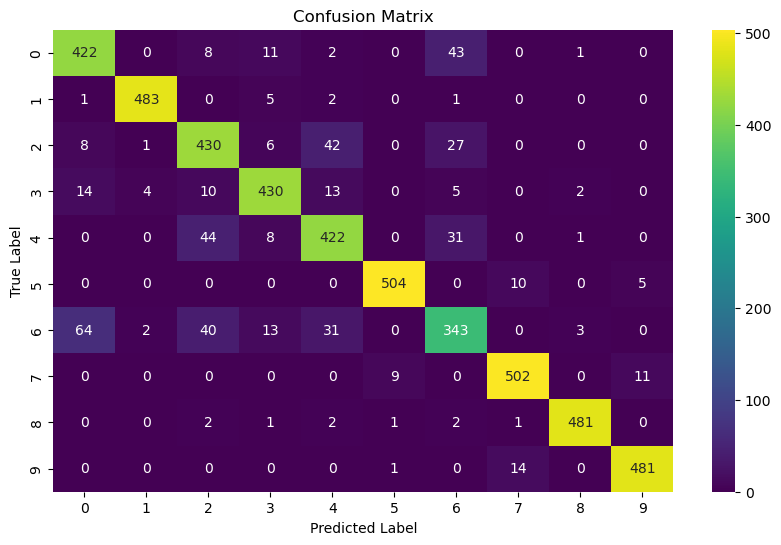

In [222]:
#plot confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='d', cmap='viridis')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()